## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
boston = datasets.load_boston()
Boston_data = boston.data
Boston_target = boston.target

X_train, X_test, y_train, y_test = train_test_split(Boston_data, Boston_target, test_size = 0.2, random_state = 42)

## Linear Regression

In [3]:
lnrg = linear_model.LinearRegression()

Stdn = MinMaxScaler()

Stdn.fit(Boston_data)

X_train_n, X_test_n = Stdn.transform(X_train), Stdn.transform(X_test)

lnrg.fit(X_train_n, y_train)

y_pred = lnrg.predict(X_test_n)

print("Mean Square Error : %.3f"%mean_squared_error(y_pred, y_test))
print("R Square Score : %.3f"%r2_score(y_test, y_pred))

Mean Square Error : 24.291
R Square Score : 0.669


In [4]:
print(lnrg.coef_)

[-10.05857199   3.01104641   1.10158605   2.7844382   -8.36047983
  23.16628091  -0.61137677 -15.92203067   6.03588392  -5.57891601
  -8.60528866   4.89829233 -18.43062842]


## LASSO

In [5]:
lasso = linear_model.Lasso(alpha=3e-3)

Stdn = MinMaxScaler()

Stdn.fit(Boston_data)

X_train_n, X_test_n = Stdn.transform(X_train), Stdn.transform(X_test)

lasso.fit(X_train_n, y_train)

y_pred = lasso.predict(X_test_n)

print("Mean Square Error : %.3f"%mean_squared_error(y_pred, y_test))
print("R Square Score : %.3f"%r2_score(y_test, y_pred))

Mean Square Error : 24.275
R Square Score : 0.669


In [6]:
print(lasso.coef_)

[ -9.45528052   2.74472932   0.70666967   2.79645836  -8.0238057
  23.10688555  -0.51386412 -15.41244556   5.5472756   -5.05670861
  -8.53243138   4.84217107 -18.45607539]


In [7]:
r2 = []
alphas = []
for alpha in range(0,5000):
    lasso = linear_model.Lasso(alpha=alpha/10000)
    lasso.fit(X_train_n, y_train)
    y_pred = lasso.predict(X_test_n)
    alphas.append(alpha/10000)
    r2.append(r2_score(y_test, y_pred))

D:\Anaconda3\envs\DNNGPU\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
D:\Anaconda3\envs\DNNGPU\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda3\envs\DNNGPU\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4371.56537615171, tolerance: 3.509685514851485
  positive)


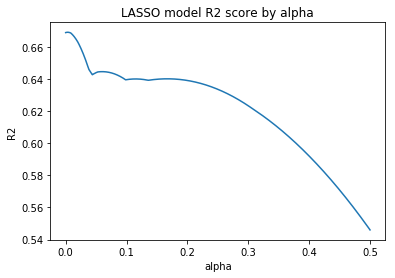

In [8]:
import matplotlib.pyplot as plt
plt.plot(alphas, r2)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('LASSO model R2 score by alpha')
plt.show()

## Ridge

In [9]:
ridge = linear_model.Ridge(alpha=1.9)

Stdn = MinMaxScaler()

Stdn.fit(Boston_data)

X_train_n, X_test_n = Stdn.transform(X_train), Stdn.transform(X_test)

ridge.fit(X_train_n, y_train)

y_pred = ridge.predict(X_test_n)

print("Mean Square Error : %.3f"%mean_squared_error(y_pred, y_test))
print("R Square Score : %.3f"%r2_score(y_test, y_pred))

Mean Square Error : 23.481
R Square Score : 0.680


In [10]:
print(ridge.coef_)

[ -5.57041949   1.60616327  -0.69871394   3.25623753  -5.69532102
  19.22881943  -0.23539681 -10.59816163   3.69281086  -3.77139474
  -8.31468093   4.58202483 -17.45114876]


In [11]:
r2 = []
alphas = []
for alpha in range(0,5000):
    ridge = linear_model.Ridge(alpha=alpha/1000)
    ridge.fit(X_train_n, y_train)
    y_pred = ridge.predict(X_test_n)
    alphas.append(alpha/1000)
    r2.append(r2_score(y_test, y_pred))

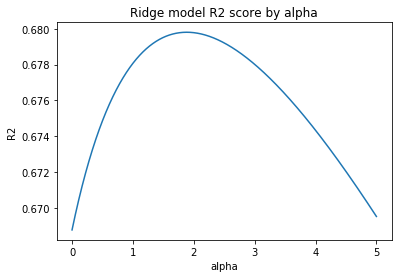

In [12]:
import matplotlib.pyplot as plt
plt.plot(alphas, r2)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('Ridge model R2 score by alpha')
plt.show()